## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [3]:
students = pd.read_csv('students.csv',sep=';')

In [4]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
students.shape

(395, 33)

In [6]:
#Based on the dataframe shape & cross-verifying the same with the dataset in excel, we can conclude that all the datapoints
#have been successfully imported into the dataframe

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [7]:
students.index.name='number'

In [8]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
students.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,395,2,GP,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,395,NaN,NaN,NaN,16.6962,1.27604,15,16,17,18,22
address,395,2,U,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,395,2,GT3,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,395,2,T,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,395,NaN,NaN,NaN,2.74937,1.09474,0,2,3,4,4
Fedu,395,NaN,NaN,NaN,2.52152,1.0882,0,2,2,3,4
Mjob,395,5,other,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,395,5,other,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [11]:
#Based on the above, none of the features seem to have NaN values. There may be incorrect data(like ?,'',#,etc) for some of the 
#non-numeric features, like MJob/FJob, which are categorical with multiple categories. However such values are not 
#present for numeric data. There are total 15 non-numeric features

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [12]:
students.select_dtypes(include='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [13]:
students.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [14]:
students.var()>1

age            True
Medu           True
Fedu           True
traveltime    False
studytime     False
failures      False
famrel        False
freetime      False
goout          True
Dalc          False
Walc           True
health         True
absences       True
G1             True
G2             True
G3             True
dtype: bool

In [15]:
#The columns traveltime,studytime,failures,famrel,freetime,Dalc has variance less than 1. Hence we are dropping these columns

In [16]:
#Creating a back-up copy with the raw-data, before we start dropping columns
students_bkup = students.copy()

In [17]:
students.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1,inplace=True)

In [18]:
students.shape

(395, 27)

In [19]:
#This confirms that the aforesaid columns have been dropped as requested

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [20]:
#The below will help us understand the different unique values in the various categorical columns
print ('Unique Schools: \n',students['school'].value_counts())
print ('\n')
print ('Unique address: \n',students['address'].value_counts())
print ('\n')
print ('Unique famsize: \n',students['famsize'].value_counts())
print ('\n')
print ('Unique Pstatus: \n',students['Pstatus'].value_counts())
print ('\n')
print ('Unique Mjob: \n',students['Mjob'].value_counts())
print ('\n')
print ('Unique Fjob: \n',students['Fjob'].value_counts())
print ('\n')
print ('Unique reason: \n',students['reason'].value_counts())
print ('\n')
print ('Unique guardian: \n',students['guardian'].value_counts())
print ('\n')
print ('Unique schoolsup: \n',students['schoolsup'].value_counts())
print ('\n')
print ('Unique famsup: \n',students['famsup'].value_counts())
print ('\n')
print ('Unique paid: \n',students['paid'].value_counts())
print ('\n')
print ('Unique activities: \n',students['activities'].value_counts())
print ('\n')
print ('Unique nursery: \n',students['nursery'].value_counts())
print ('\n')
print ('Unique higher: \n',students['higher'].value_counts())
print ('\n')
print ('Unique internet: \n',students['internet'].value_counts())
print ('\n')
print ('Unique romantic: \n',students['romantic'].value_counts())
print ('\n')

Unique Schools: 
 GP    349
MS     46
Name: school, dtype: int64


Unique address: 
 U    307
R     88
Name: address, dtype: int64


Unique famsize: 
 GT3    281
LE3    114
Name: famsize, dtype: int64


Unique Pstatus: 
 T    354
A     41
Name: Pstatus, dtype: int64


Unique Mjob: 
 other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


Unique Fjob: 
 other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


Unique reason: 
 course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64


Unique guardian: 
 mother    273
father     90
other      32
Name: guardian, dtype: int64


Unique schoolsup: 
 no     344
yes     51
Name: schoolsup, dtype: int64


Unique famsup: 
 yes    242
no     153
Name: famsup, dtype: int64


Unique paid: 
 no     214
yes    181
Name: paid, dtype: int64


Unique activities: 
 yes    201
no     194
Name: activities, dtype: int

In [21]:
#As we can see from the above,most of the above categorical fields are not ordinal in nature. Hence we shouldn't apply 
#Label Encoding, but should rather look at One-Hot Encoding
students = pd.get_dummies(students, columns=['school'])
students = pd.get_dummies(students, columns=['sex'])
students = pd.get_dummies(students, columns=['address'])
students = pd.get_dummies(students, columns=['famsize'])
students = pd.get_dummies(students, columns=['Pstatus'])
students = pd.get_dummies(students, columns=['Mjob'])
students = pd.get_dummies(students, columns=['Fjob'])
students = pd.get_dummies(students, columns=['reason'])
students = pd.get_dummies(students, columns=['guardian'])
students = pd.get_dummies(students, columns=['schoolsup'])
students = pd.get_dummies(students, columns=['famsup'])
students = pd.get_dummies(students, columns=['paid'])
students = pd.get_dummies(students, columns=['activities'])
students = pd.get_dummies(students, columns=['nursery'])
students = pd.get_dummies(students, columns=['higher'])
students = pd.get_dummies(students, columns=['internet'])
students = pd.get_dummies(students, columns=['romantic'])

In [22]:
students.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,3,1,3,4,5,5,6,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,2,2,5,4,6,10,10,...,1,0,0,1,0,1,1,0,1,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [23]:
students["G1"] = np.where(students["G1"] >= 10,"1","0")
students["G2"] = np.where(students["G2"] >= 10,"1","0")
students["G3"] = np.where(students["G3"] >= 10,"1","0")
students.head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,0,0,0,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,3,1,3,4,0,0,0,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,2,3,3,10,0,0,1,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,2,1,5,2,1,1,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,2,2,5,4,0,1,1,...,1,0,0,1,0,1,1,0,1,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [24]:
X = students.drop('G3', axis=1)
y = students[['G3']] 

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

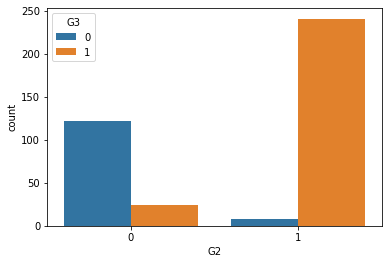

In [25]:
sns.countplot('G2',hue='G3',data=students)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

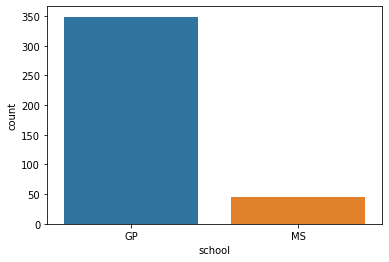

In [26]:
sns.countplot('school',data=students_bkup)

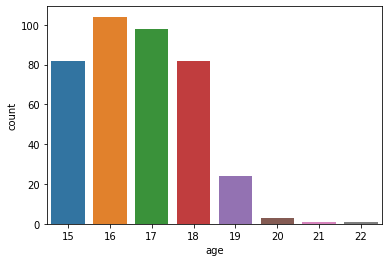

In [27]:
sns.countplot('age',data=students_bkup)

In [28]:
#It seems most students study in GP, while most students are of the age 16-17. However we have some outliers also with age above
#20. The data is thus highly skewed on the school attribute & we will need to see how this affects our model

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.24,random_state=1)
X_train.shape

(300, 52)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [30]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/Users/debajyotidas/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/debajyotidas/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
print ('Logistic Regression accuracy score: ',metrics.accuracy_score(y_test,y_pred_test_lr))

Logistic Regression accuracy score:  0.9052631578947369


In [32]:
print (metrics.classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



In [33]:
#From the above Classification report, we can deduce that the model is slightly skewed towards class-1

# Naive bayes with Iris data

### Import Iris.csv

In [218]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [219]:
iris.shape

(150, 6)

In [220]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [221]:
#From the above 5-point summary, it seems that PetalLengthCm feature is slightly left-skewed, with median > mean.
#All the other features, seem to be very slightly (probably neglibly) skewed

In [222]:
#From an overview of the data, the 'Id' column seems to refer to some id tagging of the individual sample data\
#It's unique for every datapoint & is continuous in nature. Thus we can safely drop the same.
#Lastly, let's create a back-up of the raw-data, before we drop any column
iris_bkup = iris.copy()
iris.drop('Id',axis=1,inplace=True)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [223]:
X= iris.drop('Species', axis=1)
y= iris['Species']

### Find the distribution of target variable (Class)

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


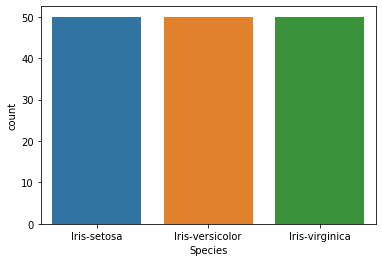

In [224]:
#Let us see if the target variable is evenly distributed across all possible classes.
print(y.value_counts())
sns.countplot(y)

In [225]:
#From the above, we can see that there are 3 unique species, and the dataset has equal distribution of all 3 classes
#with 50 datapoints each

### Plot the distribution of target variable using histogram

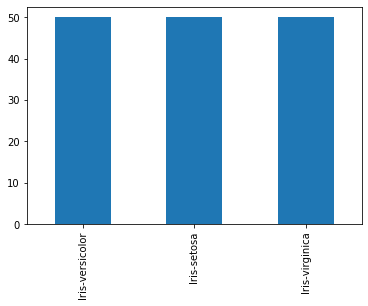

In [226]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

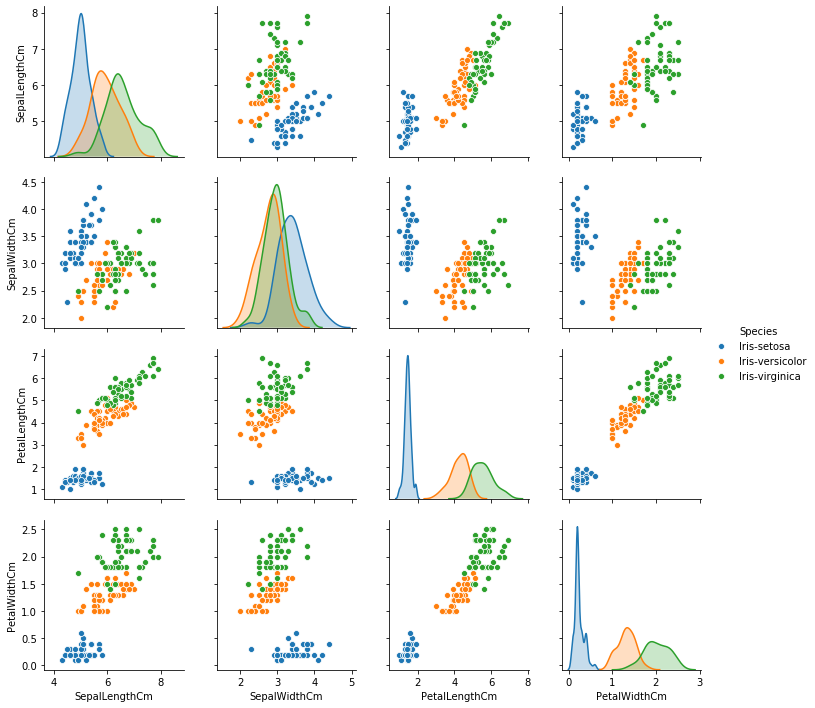

In [227]:
sns.pairplot(iris,hue='Species')

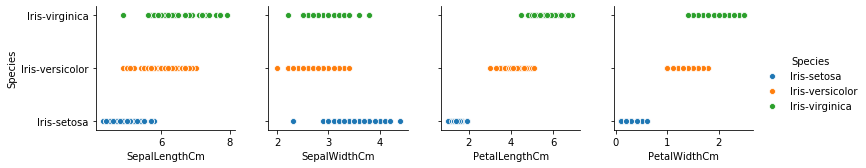

In [228]:
sns.pairplot(iris,x_vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'),y_vars='Species',hue='Species')

From the above distributions, it seems 'Sepal Length' is always less than 6cm for SETOSA, while VIRGINICA has 'Sepal Length' mostly above 6 cm. VERSICOLOR has overlapping sepal lengths.

The same analysis can be said for 'Petal Length' also, where SETOSA is below 2 cm while VIRGINICA is above 4 cm.

Lastly, the above is true for 'Petal Width' too, where SETOSA is below 1 cm while VIRGINICA is above 1 cm.

Thus based on 'Sepal Length', 'Petal Length', 'Petal Width'; it's quiet easy to classify SETOSA & VIRGINICA but not so easy to identify VERSICOLOR

### Summary Statistics and explain insights for at least 2 variables

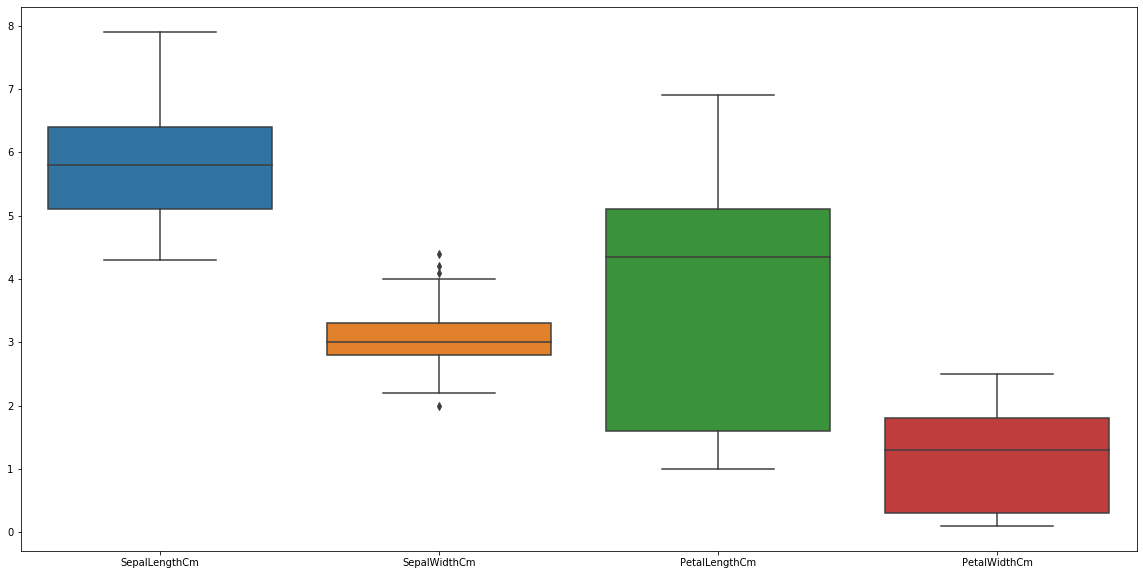

In [229]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X)

In [230]:
#From a rough overview of the data, the 'Id' column seemed to refer to some id tagging of the individual sample data\
#It's unique for every datapoint & is continuous in nature. Hence we have excluded the same from the above analysis

#We have also excluded the 'Species' data, as it's the target variable

#From the above 5-point summary, PetalLengthCm feature is highly left-skewed, with median > mean.
#Of the other features, PetalWidthCm seems to be left-skewed as well, while SepalWidthCm is slightly right-skewed
#while SepalLengthCm seems to be normally distributed

#SepalWidthCm also has outliers, which is not present in any of the other variables.

### Correlation among all variables and give your insights

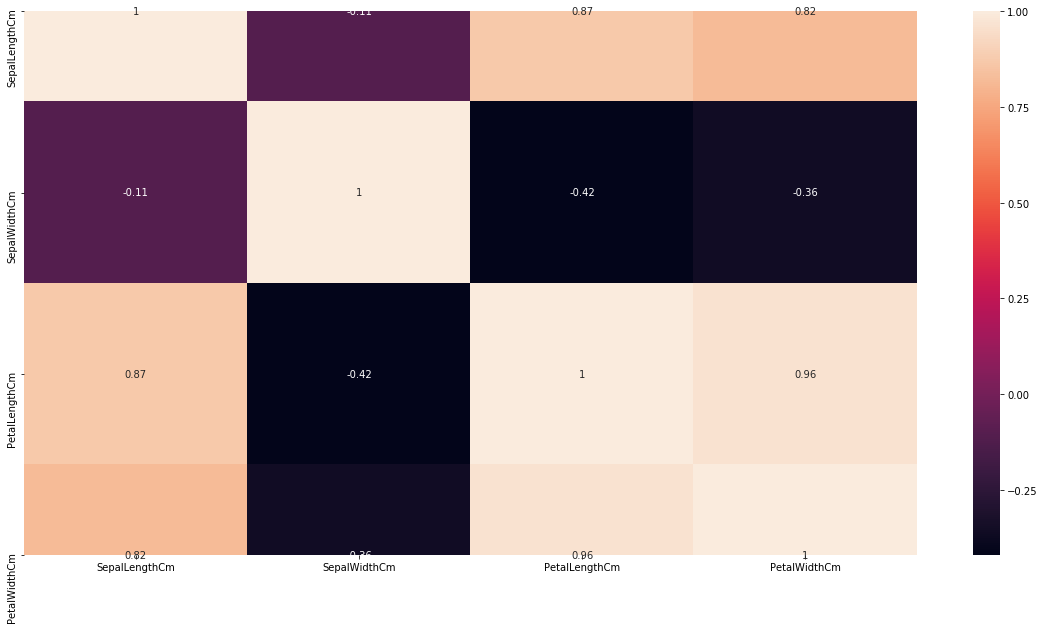

In [231]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)

In [232]:
#There is strong positive correlation between SepalLengthCm & both PetalLengthCm, PetalWidthCm
#Similarly PetalWidthCm & PetalLengthCm also has a very strong Positive Correlation

### Split data in Training and Validation in 80:20

In [233]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Do Feature Scaling

In [234]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
#scaler = preprocessing.StandardScaler()
#X_train_scaled=scaler.fit_transform(X_train)
#X_test_scaled=scaler.fit_transform(X_test)

### Train and Fit NaiveBayes Model

In [235]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [240]:
y_pred_train = gnb.predict(X_train_scaled)

In [241]:
y_pred_test = gnb.predict(X_test_scaled)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [242]:
print ('Accuracy of Gaussian NB Classifier is: ',metrics.accuracy_score(y_test,y_pred_test))

Accuracy of Gaussian NB Classifier is:  0.9


In [243]:
print(metrics.classification_report(y_test,y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.67      1.00      0.80         6

       accuracy                           0.90        30
      macro avg       0.89      0.92      0.89        30
   weighted avg       0.93      0.90      0.90        30



### Insights :
        1. The accuracy score of the model is quiet high at 90%, which suggests 9 out of 10 times the model will classify correctly.
        2. Precision of a model is an indication of it's ability to label a sample as positive, when it's actually so & vice-versa. In our case, the model is able to predict Iris-setosa or Iris-versicolor, with 100% precision, but when the sample is Iris-virginica, the model's precision falls to 67%.
        3. Similarly, Recall is the measure of the model being able to predict correctly, from the total number of correct results. When the samples are Iris-setosa or Iris-virginica, the model identifies them 100% of the times where as when the sample is Iris-versicolor, the model identifies them correctly 77% of the times.